###  Problem Statement

The goal of this project is to analyze and predict student performance based on various socio-economic and demographic factors such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course. By using machine learning techniques, we aim to build a model that can predict a student's total or average test score, which can help identify students who may need academic support and uncover key factors influencing performance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [13]:
df=pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no any missing vaues in the dataset

In [16]:
df.duplicated().sum()

np.int64(0)

### There are no any duplicate values in the dataset

In [18]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [20]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [21]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [22]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [41]:
df["parental level of education"]=df['parental level of education'].str.replace("some high school", "high school")
df['parental level of education'].value_counts()

parental level of education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### Check the Statitics of Data

In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###  Key Insights from Descriptive Statistics

- The **mean scores** of all three subjects are close to each other:
  - Maths: ~66
  - Reading: ~69
  - Writing: ~68

- The **mean and median** values are nearly the same for each subject.
  -  This indicates that the **distributions are approximately normal**, with little to no skew.

- The **minimum scores** reveal some performance gaps:
  - Maths: Minimum score is **0**
  - Reading: Minimum score is **17**
  - Writing: Minimum score is **15**
  
    This suggests that some students **completely failed in Maths**, while **Reading and Writing** scores had higher minimums, implying **better performance or support** in those subjects.


### Feature Engineering

In [24]:
df["total score"]=df["math score"]+df["writing score"]+df["reading score"]
df["average score"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
math_full=df[df['math score']==100]["average score"].count()
reading_full=df[df['reading score']==100]["average score"].count()
writing_full=df[df['writing score']==100]["average score"].count()

print(f"Number of student who got full marks in maths: {math_full}")
print(f"Number of student who got full marks in reading: {reading_full}")
print(f"Number of student who got full marks in writing: {writing_full}")

Number of student who got full marks in maths: 7
Number of student who got full marks in reading: 17
Number of student who got full marks in writing: 14


In [29]:
math_less_than_20=df[df['math score']<=20]["average score"].count()
reading_less_than_20=df[df['reading score']<=20]["average score"].count()
writing_less_than_20=df[df['writing score']<=20]["average score"].count()

print(f"Number of student who got less than 20 marks in maths: {math_less_than_20}")
print(f"Number of student who got less than 20 marks in reading: {reading_less_than_20}")
print(f"Number of student who got less than 20 marks in writing: {writing_less_than_20}")

Number of student who got less than 20 marks in maths: 4
Number of student who got less than 20 marks in reading: 1
Number of student who got less than 20 marks in writing: 3


- Insights
  - Student's performance in maths is bad
  - Students are performing well in reading

### Visualization

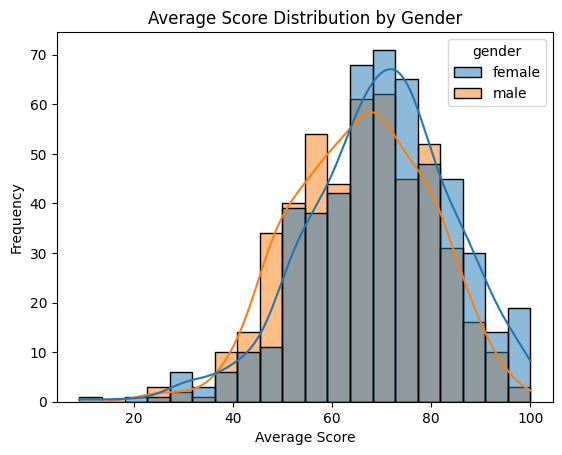

In [32]:
sns.histplot(data=df, x="average score", hue="gender", kde=True, bins=20)
plt.title("Average Score Distribution by Gender")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

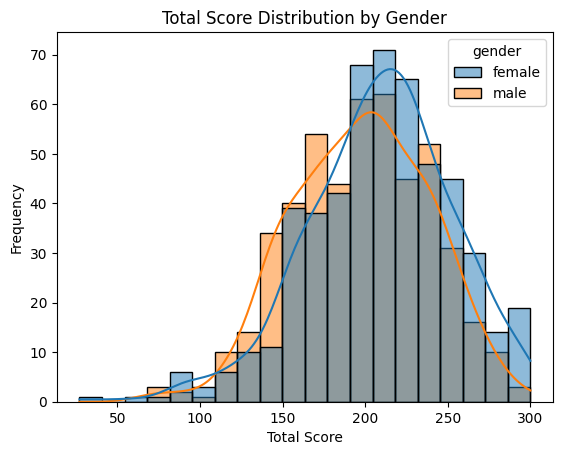

In [35]:
sns.histplot(data=df, x="total score", hue="gender", kde=True, bins=20)
plt.title("Total Score Distribution by Gender")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

 Female performance is good as comapred to male

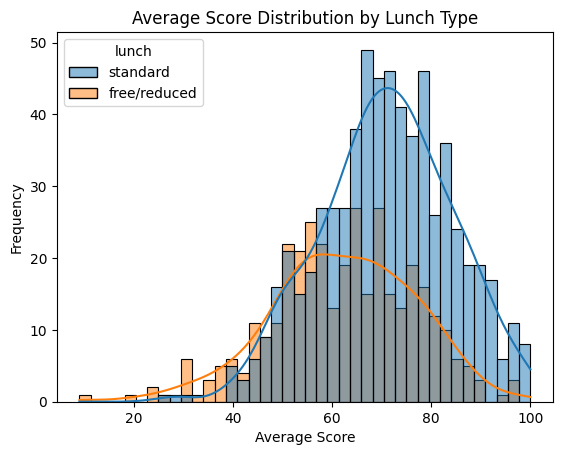

In [38]:
sns.histplot(data=df,x="average score",hue='lunch',kde=True,bins=40)
plt.title("Average Score Distribution by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

Studnets who hve standard lunch are performaing well in exams

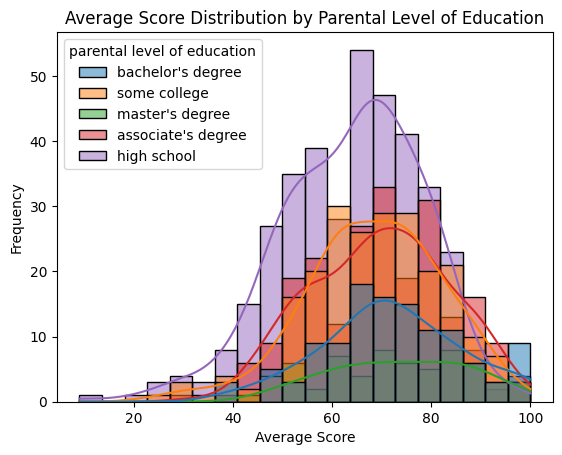

In [42]:
sns.histplot(data=df,x="average score",hue='parental level of education',kde=True,bins=20)
plt.title("Average Score Distribution by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

- This graph shows positive realtion of parent eduction with test score as levle of eduction increase , the students are performing well
- The students whom parents got bachalor's or master's degree got highest marks

<Axes: xlabel='lunch', ylabel='writing score'>

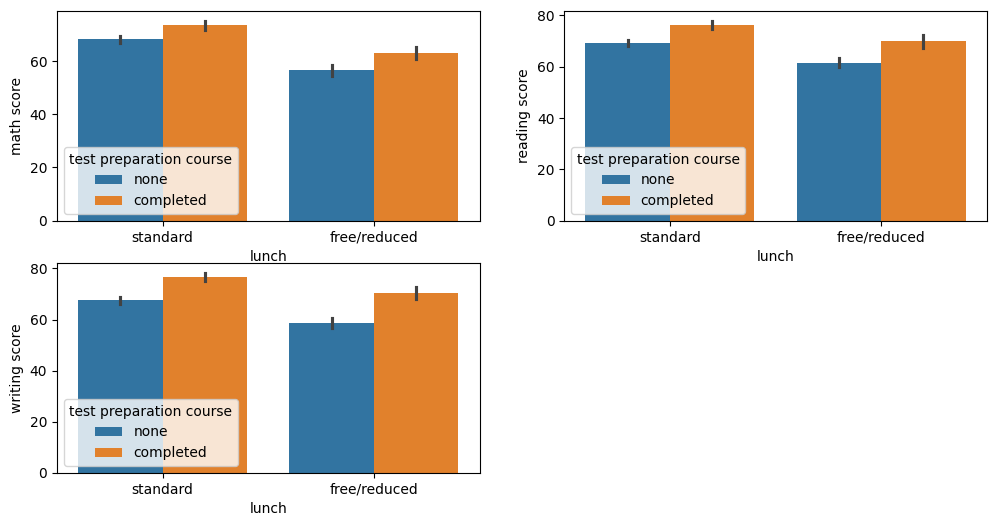

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

The students who have completed the course got good marks in all the subjects

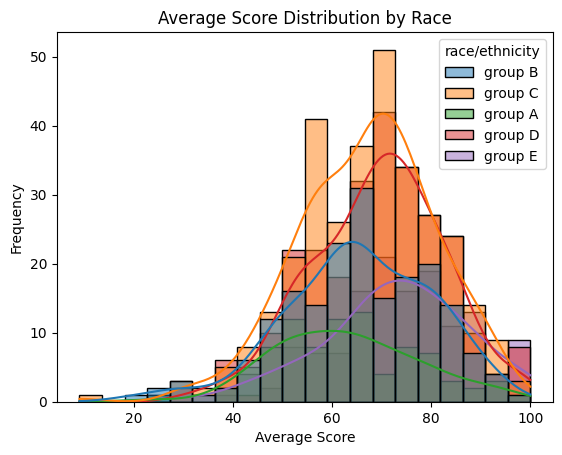

In [46]:
sns.histplot(data=df,x="average score",hue='race/ethnicity',kde=True,bins=20)
plt.title("Average Score Distribution by Race")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

Students from group A and group B tends to perform poorly

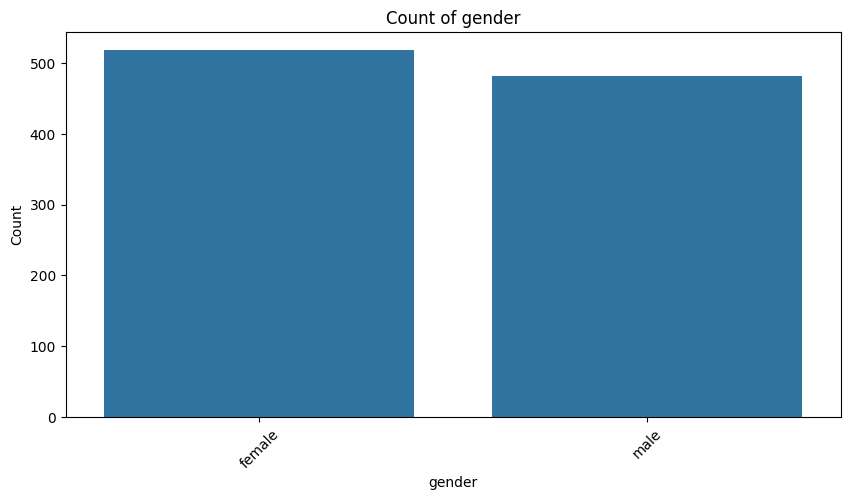

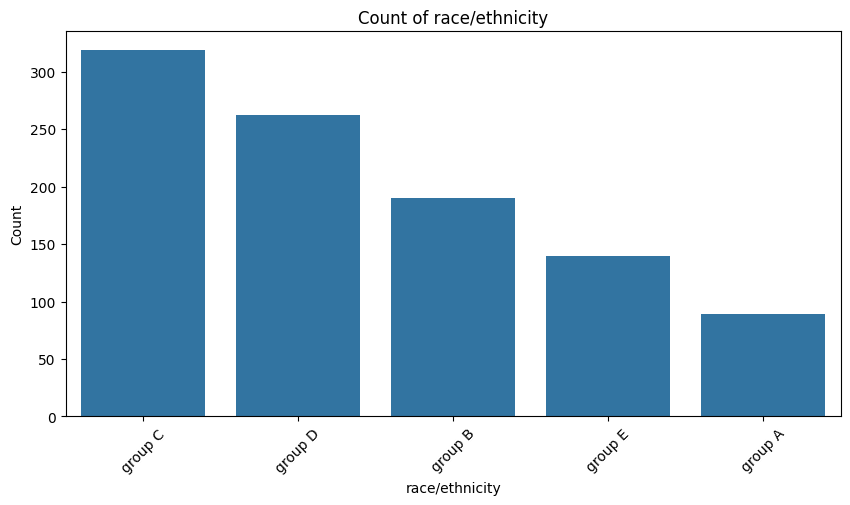

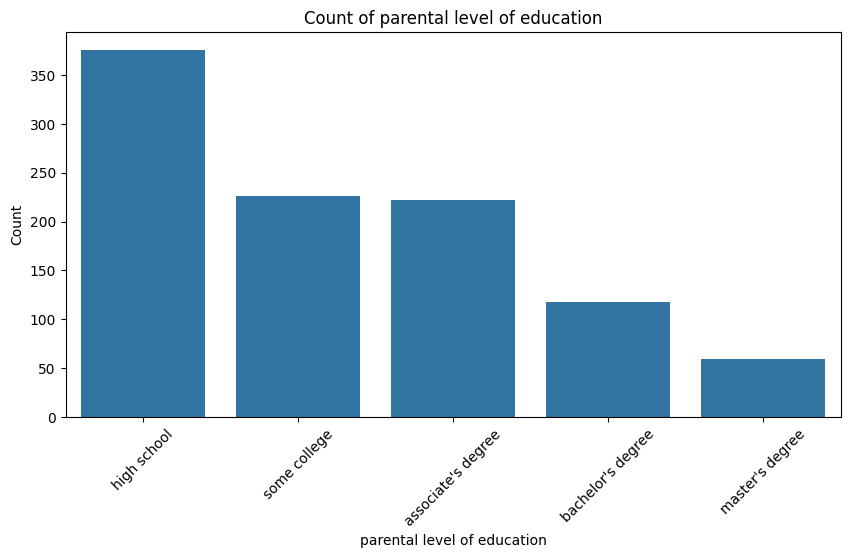

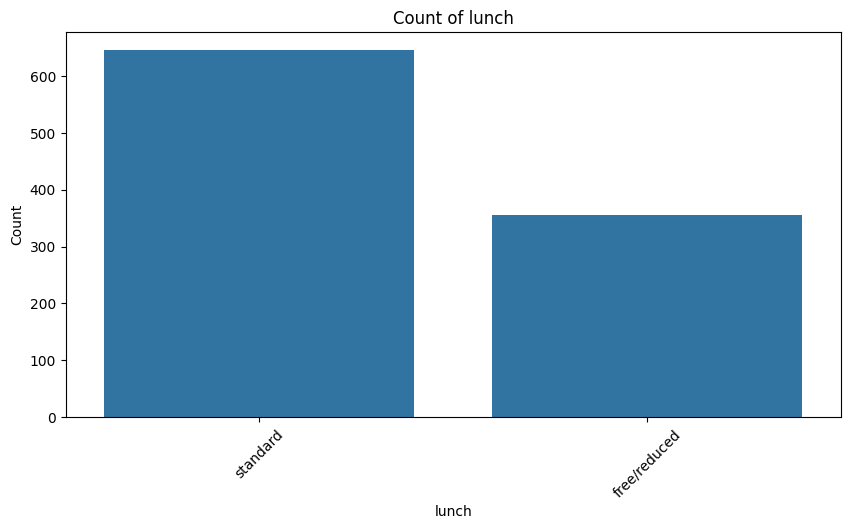

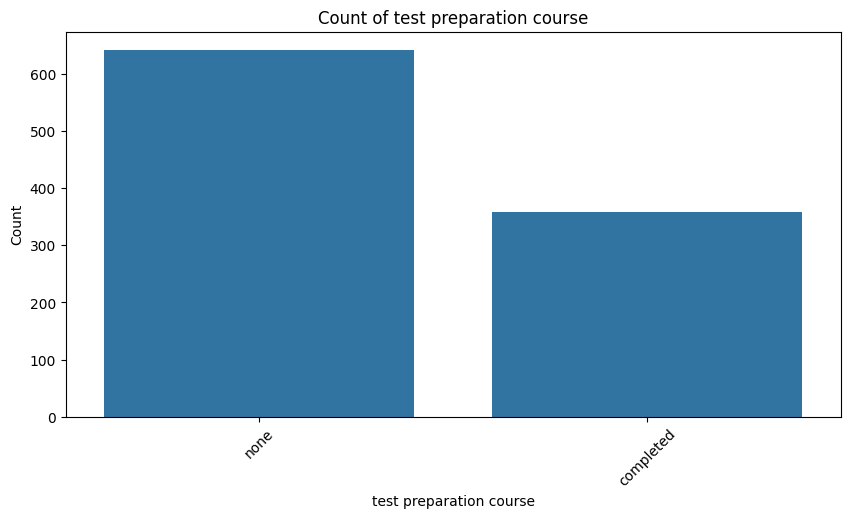

In [47]:
categorial_columns=df.select_dtypes(include=['object']).columns
for column in categorial_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


- Number of female studens are more as compared to male
- Number of students who have not completed test course are more
- Parents who got education from high school are more
- Students from group C are more
- Number of students who have standard lunch are more

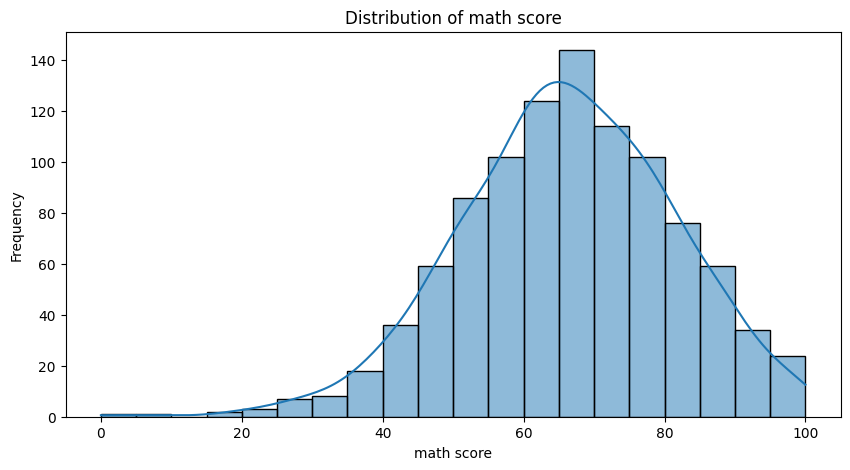

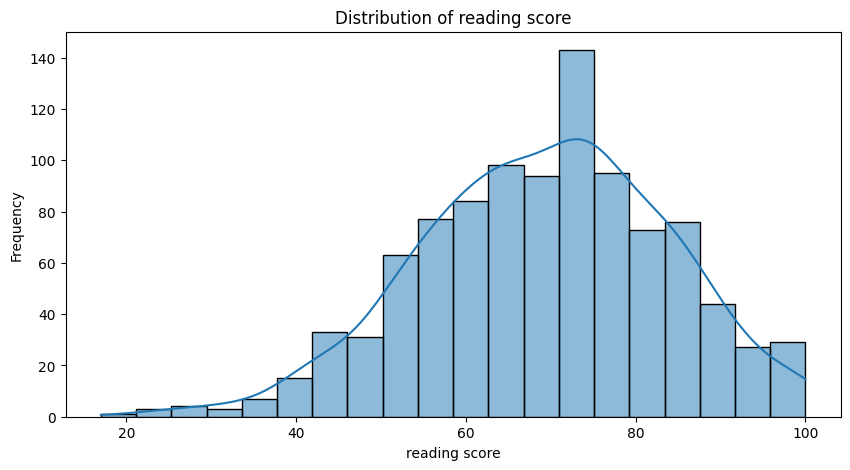

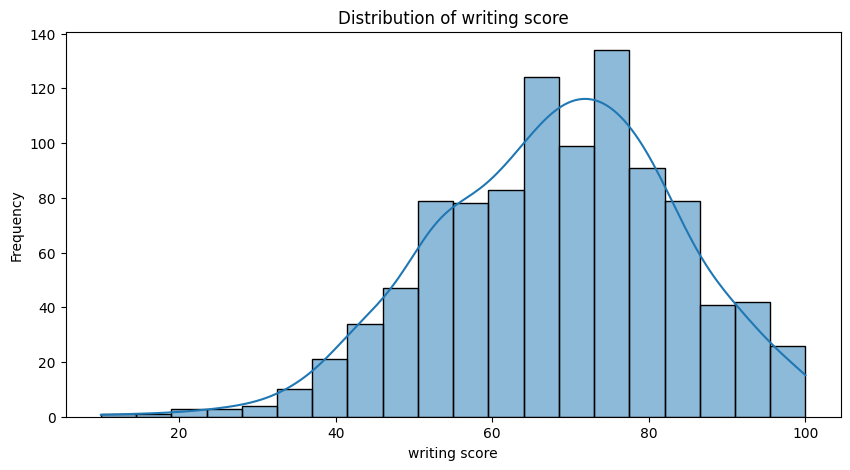

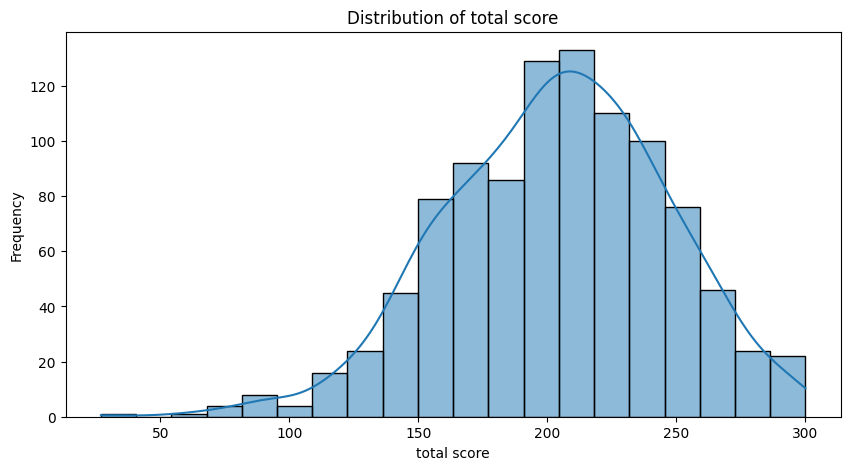

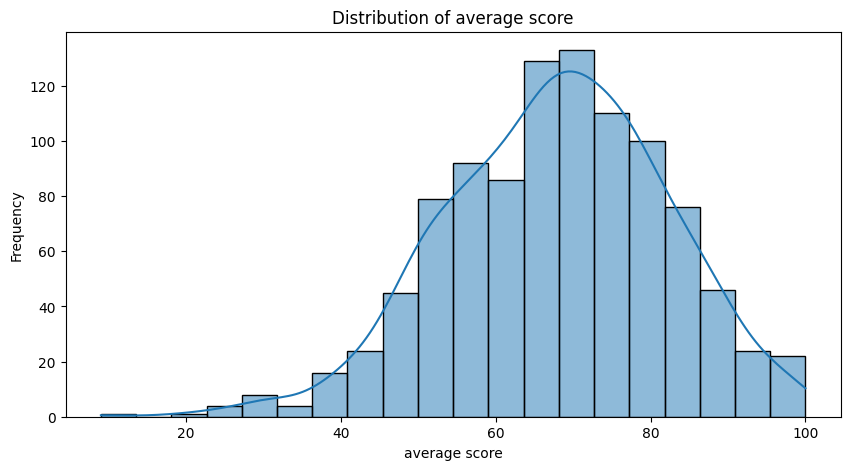

In [48]:
numerical_columns=df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### Check for Outliers

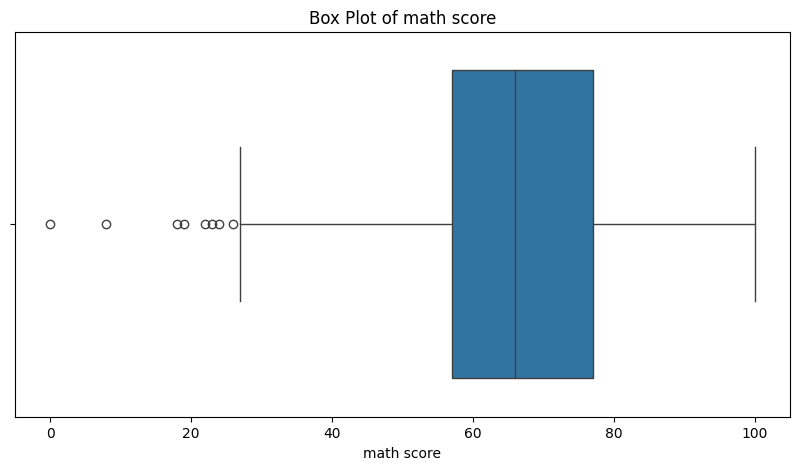

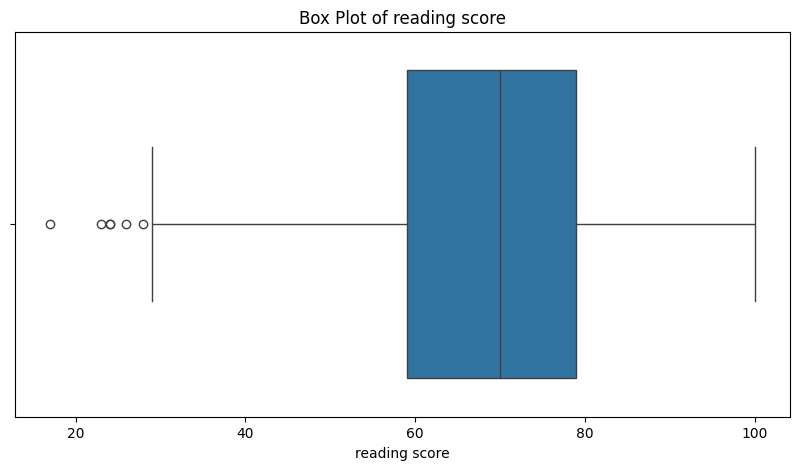

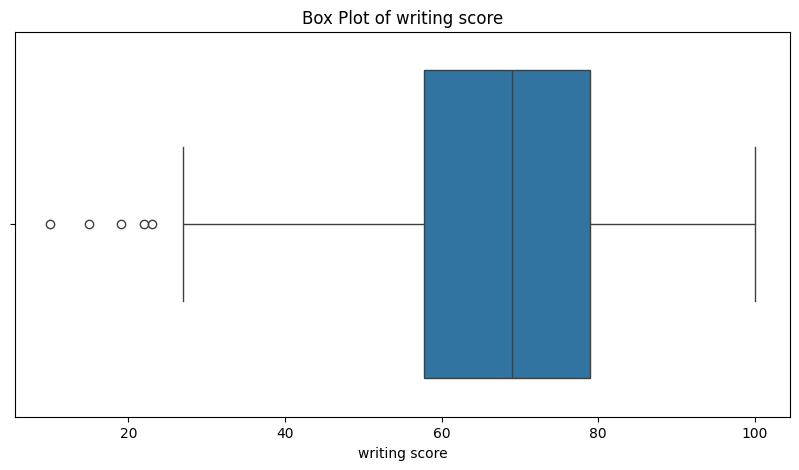

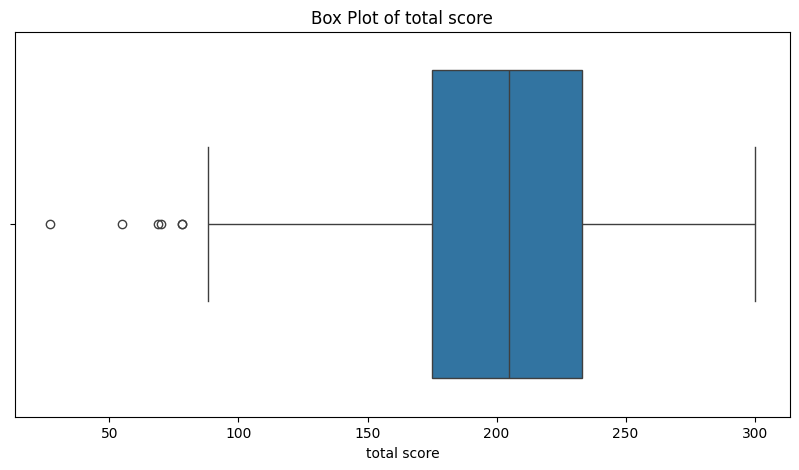

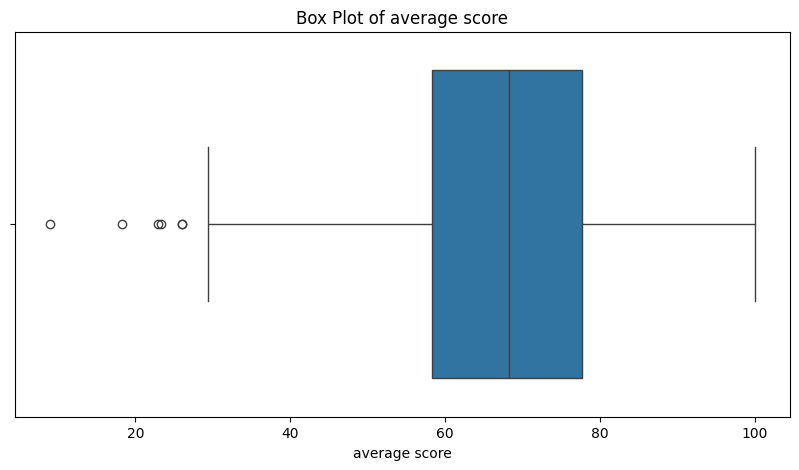

In [49]:
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=column)
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

###  Final Conclusions from EDA

- **Gender-wise Performance:**
  - Female students tend to perform **better** in exams compared to male students.
  - The **number of female students** is also higher than male students in the dataset.

- **Impact of Lunch Type:**
  - Students who receive **standard lunch** perform **better** than those who receive free/reduced lunch.
  - The number of students with **standard lunch** is also higher.

- **Parental Education vs Student Performance:**
  - There's a **positive correlation** between **parental education level** and **student scores**.
  - Students whose parents have a **bachelor’s or master’s degree** score the **highest on average**.
  - Most parents in the dataset have completed only **high school**.

- **Test Preparation Course:**
  - Students who **completed the test preparation course** performed **better in all subjects**.
  - However, the majority of students **did not complete** the preparation course.

- **Race/Ethnicity Insights:**
  - Students from **group C** are the most common in the dataset.
  - Students from **group A and B** tend to perform **lower** compared to other groups.

---

These insights help us understand the key factors that influence student performance, which will be useful for feature selection and model training in the next steps.
